In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
# Assuming your files are located in the following paths:
models_path = '/content/drive/MyDrive/HW_5_CS/models.py'

# Import the files
import sys
sys.path.append('/content/drive/MyDrive/HW_5_CS')

# Now you can import your models and utils as if they were in the Colab environment
import  models


In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.integrate import solve_ivp

from models import *

save_figures = True
save_dir = './Report/figs'
questions_number = '1_2_2'
if save_figures:
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)

Part_1

In [ ]:
input_currents = [
    lambda t: 20 if (t>=60) else 40 if (t>=20 and t<=20.5) else 0.0,
]

t_start = 0
t_end = 100
dt = 0.01
t = np.arange(t_start, t_end, dt)

k = 0

for input_current in input_currents:
    for percentage in np.arange(0.5,2.5,0.5):
        model = HodgkinHuxleyModel()
        model.g_Na *= percentage

        sol = solve_ivp(
            lambda t, Y: model(Y, I=input_current(t)),
            t_span=[t_start, t_end],
            y0=model.get_initial_state(),
            t_eval=t,
            vectorized=True,
            method = 'RK23',
        )

        V, n, m, h = sol.y
        I_Na, I_K, I_L = model.get_currents(*sol.y)

        fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12.8, 4.8))
        ax[0,0].plot(sol.t, np.vectorize(input_current)(sol.t))
        ax[0,0].set_ylim([-2,32])
        ax[0,0].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[0,0].set_ylabel('$I\;[\mu\mathrm{A}/c\mathrm{m}^2]$')
        ax[0,0].set_title('Input Current')
        ax[0,0].grid()
        ax[0,1].plot(sol.t, V)
        ax[0,1].set_ylim([-90,50])
        ax[0,1].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[0,1].set_ylabel('$V\;[m\mathrm{V}]$')
        ax[0,1].set_title('Membrane Voltage')
        ax[0,1].grid()
        ax[1,0].plot(sol.t, I_Na, label='$I_\mathrm{Na}$')
        ax[1,0].plot(sol.t, I_K, label='$I_\mathrm{K}$')
        ax[1,0].plot(sol.t, I_L, label='$I_\mathrm{L}$')
        ax[1,0].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[1,0].set_ylabel('$I\;[\mu\mathrm{A}/c\mathrm{m}^2]$')
        ax[1,0].set_title('Ion and leak currents')
        ax[1,0].legend(loc='lower right')
        ax[1,0].grid()
        ax[1,1].plot(sol.t, n, label='$n$')
        ax[1,1].plot(sol.t, m, label='$m$')
        ax[1,1].plot(sol.t, h, label='$h$')
        ax[1,1].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[1,1].set_title('Gating Variables')
        ax[1,1].legend(loc='lower right')
        ax[1,1].grid()
        fig.suptitle('Hodgkin-Huxley Model Response with $g_\mathrm{Na}=' + f'{model.g_Na:.2f}$')
        plt.tight_layout()
        if save_figures:
            plt.savefig(f'{save_dir}/{questions_number}_1_{k}.png')
            k += 1

for input_current in input_currents:
    for percentage in np.arange(0.5,2.5,0.5):
        model = HodgkinHuxleyModel()
        model.g_K *= percentage

        sol = solve_ivp(
            lambda t, Y: model(Y, I=input_current(t)),
            t_span=[t_start, t_end],
            y0=model.get_initial_state(),
            t_eval=t,
            vectorized=True,
            method = 'RK23',
        )

        V, n, m, h = sol.y
        I_Na, I_K, I_L = model.get_currents(*sol.y)

        fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12.8, 4.8))
        ax[0,0].plot(sol.t, np.vectorize(input_current)(sol.t))
        ax[0,0].set_ylim([-2,32])
        ax[0,0].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[0,0].set_ylabel('$I\;[\mu\mathrm{A}/c\mathrm{m}^2]$')
        ax[0,0].set_title('Input Current')
        ax[0,0].grid()
        ax[0,1].plot(sol.t, V)
        ax[0,1].set_ylim([-90,50])
        ax[0,1].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[0,1].set_ylabel('$V\;[m\mathrm{V}]$')
        ax[0,1].set_title('Membrane Voltage')
        ax[0,1].grid()
        ax[1,0].plot(sol.t, I_Na, label='$I_\mathrm{Na}$')
        ax[1,0].plot(sol.t, I_K, label='$I_\mathrm{K}$')
        ax[1,0].plot(sol.t, I_L, label='$I_\mathrm{L}$')
        ax[1,0].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[1,0].set_ylabel('$I\;[\mu\mathrm{A}/c\mathrm{m}^2]$')
        ax[1,0].set_title('Ion and leak currents')
        ax[1,0].legend(loc='lower right')
        ax[1,0].grid()
        ax[1,1].plot(sol.t, n, label='$n$')
        ax[1,1].plot(sol.t, m, label='$m$')
        ax[1,1].plot(sol.t, h, label='$h$')
        ax[1,1].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[1,1].set_title('Gating Variables')
        ax[1,1].legend(loc='lower right')
        ax[1,1].grid()
        fig.suptitle('Hodgkin-Huxley Model Response with $g_\mathrm{K}=' + f'{model.g_K:.2f}$')
        plt.tight_layout()
        if save_figures:
            plt.savefig(f'{save_dir}/{questions_number}_1_{k}.png')
            k += 1

Part_2

<ipython-input-5-2a4369299e9d>:164: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12.8, 4.8))


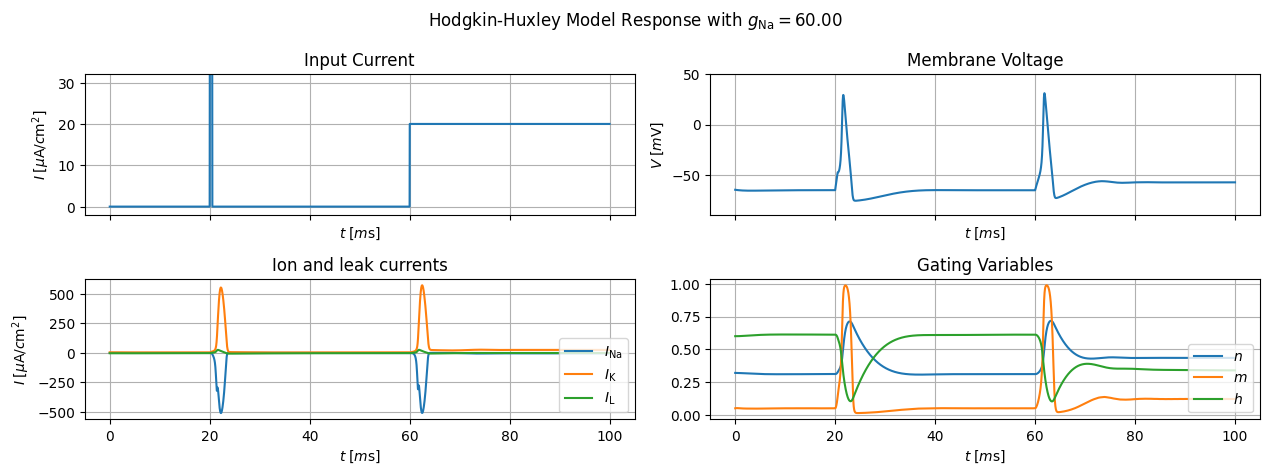

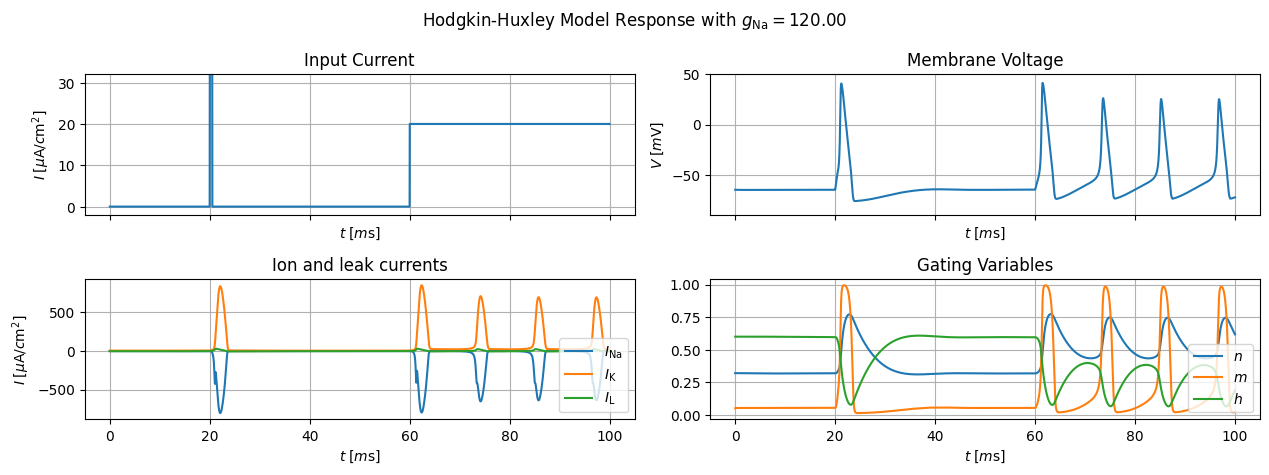

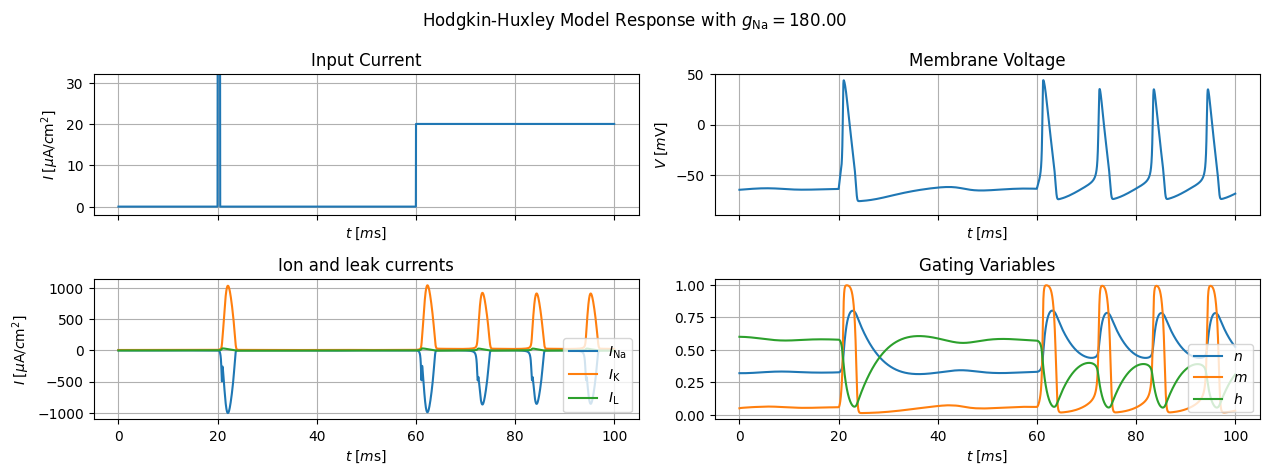

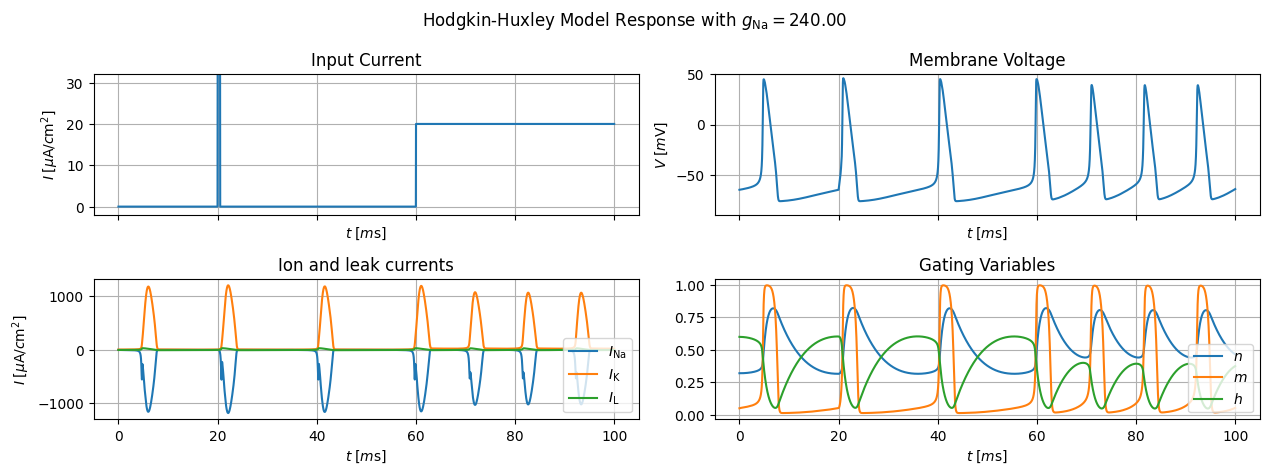

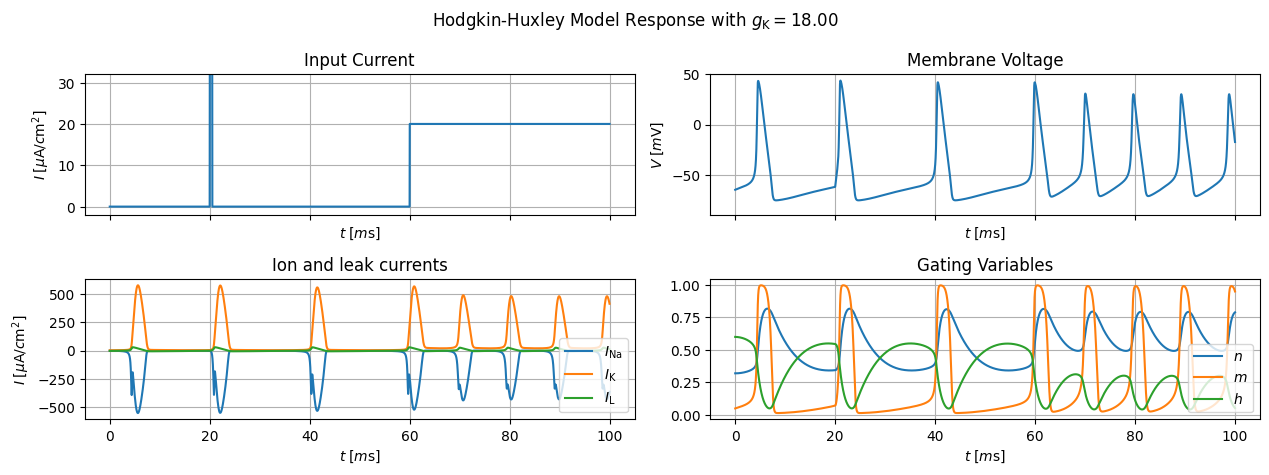

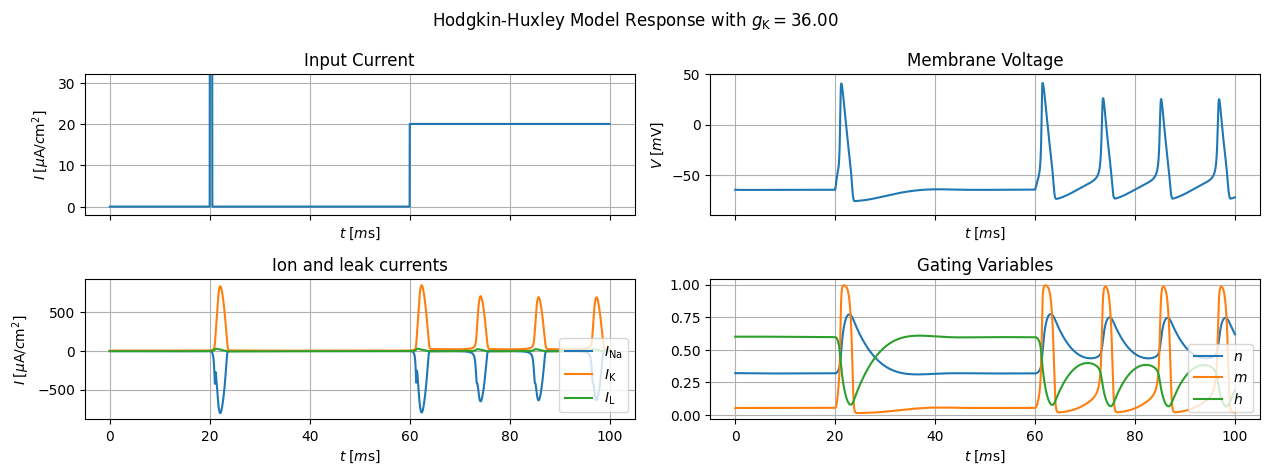

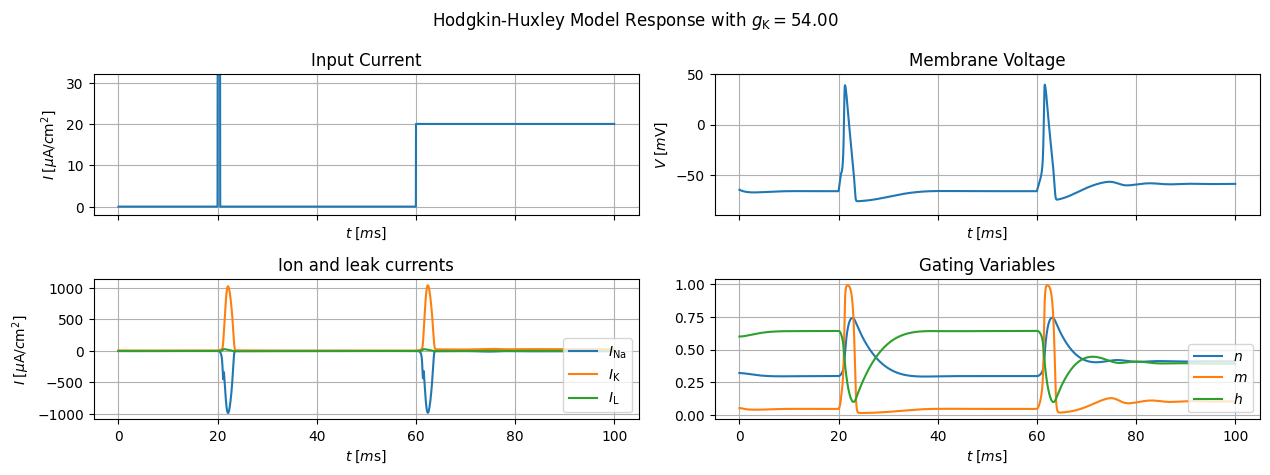

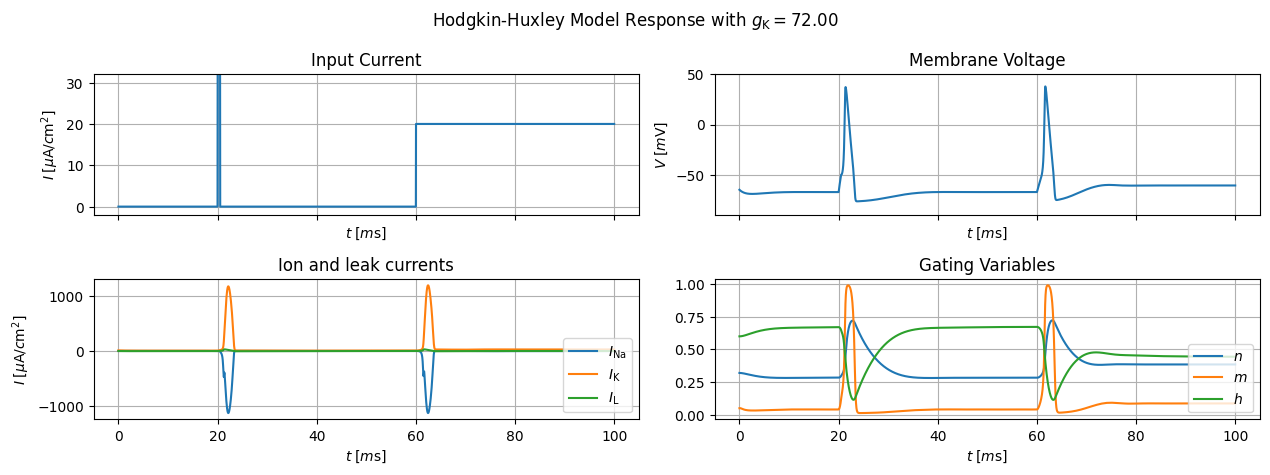

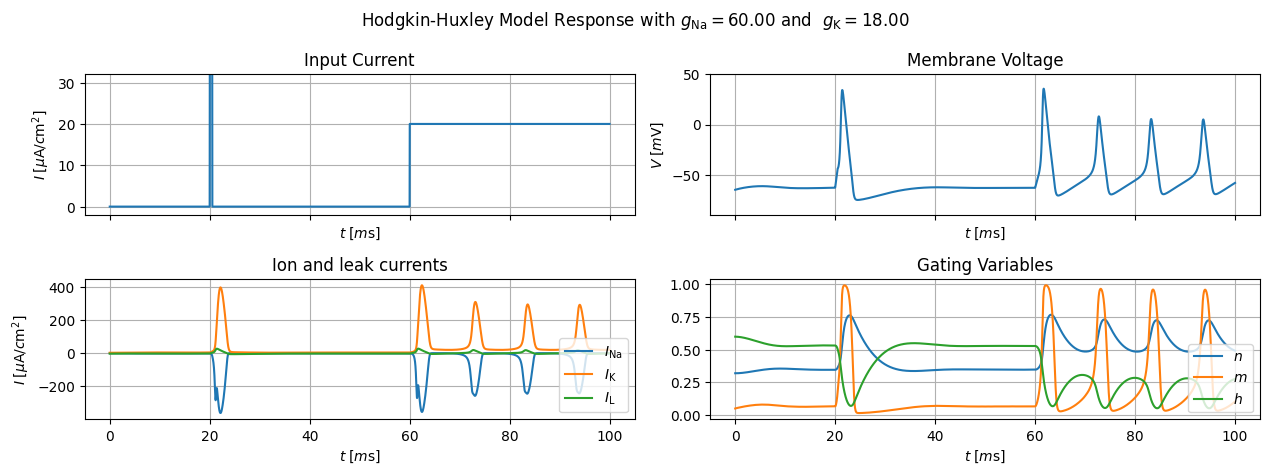

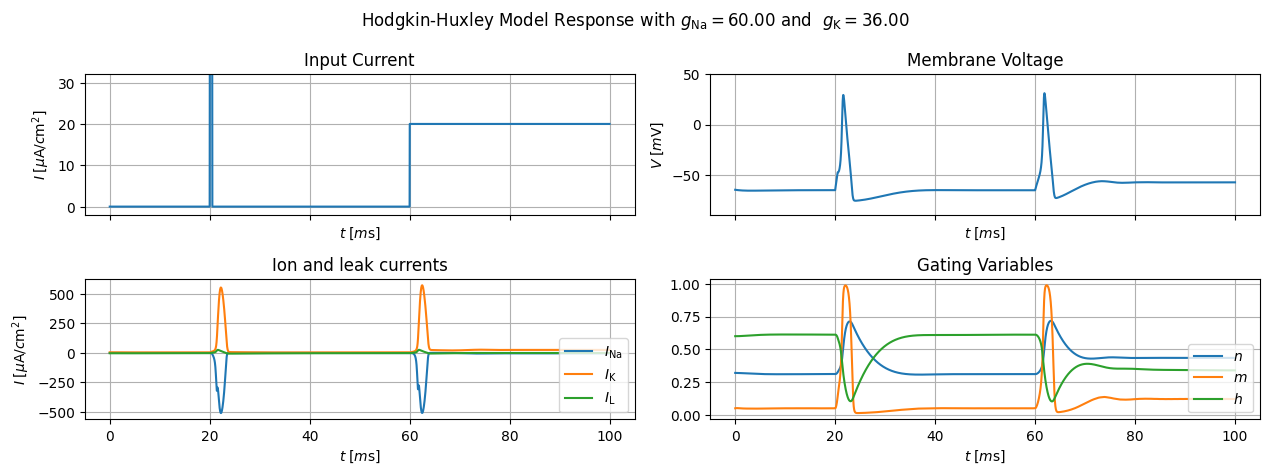

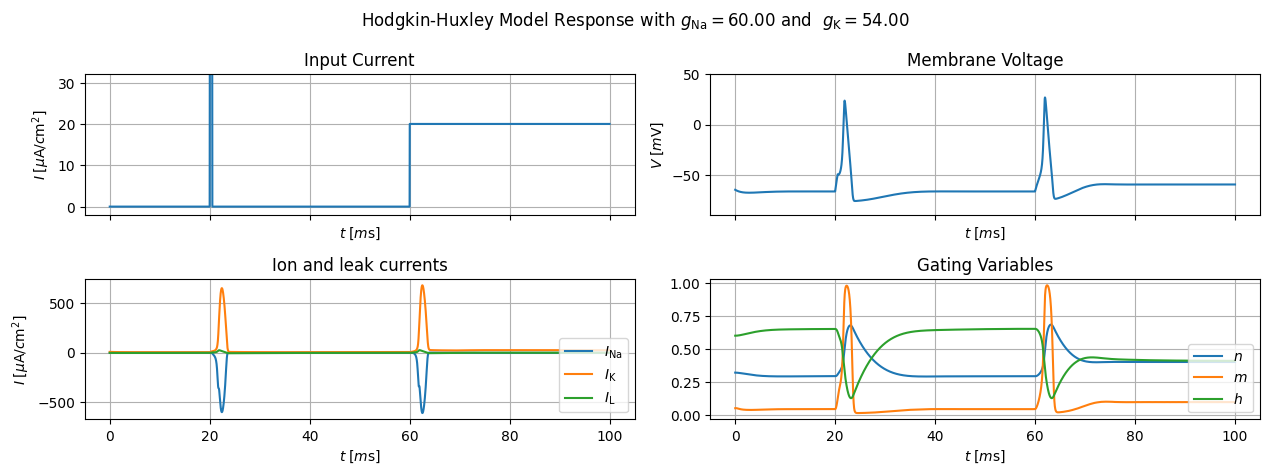

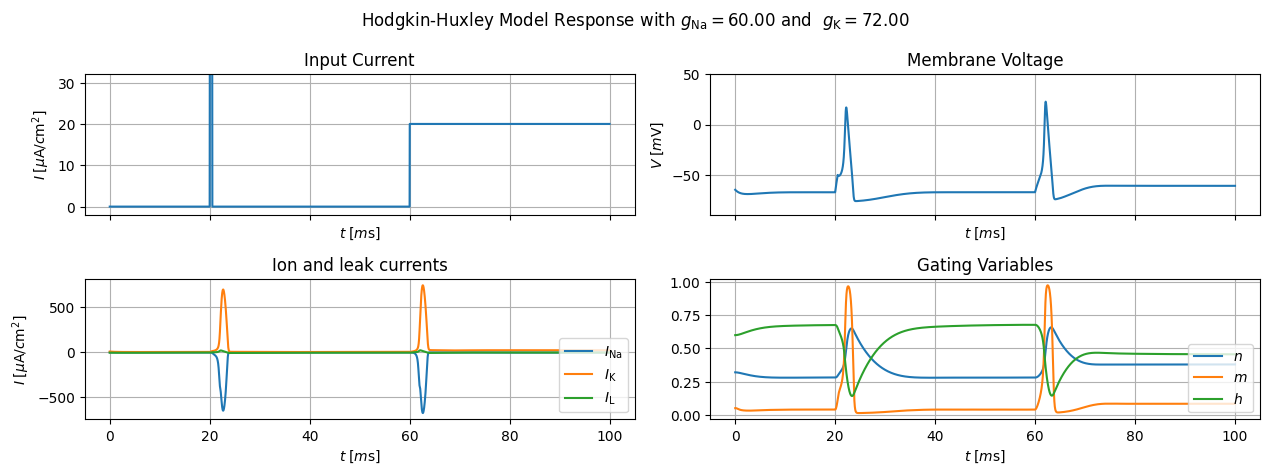

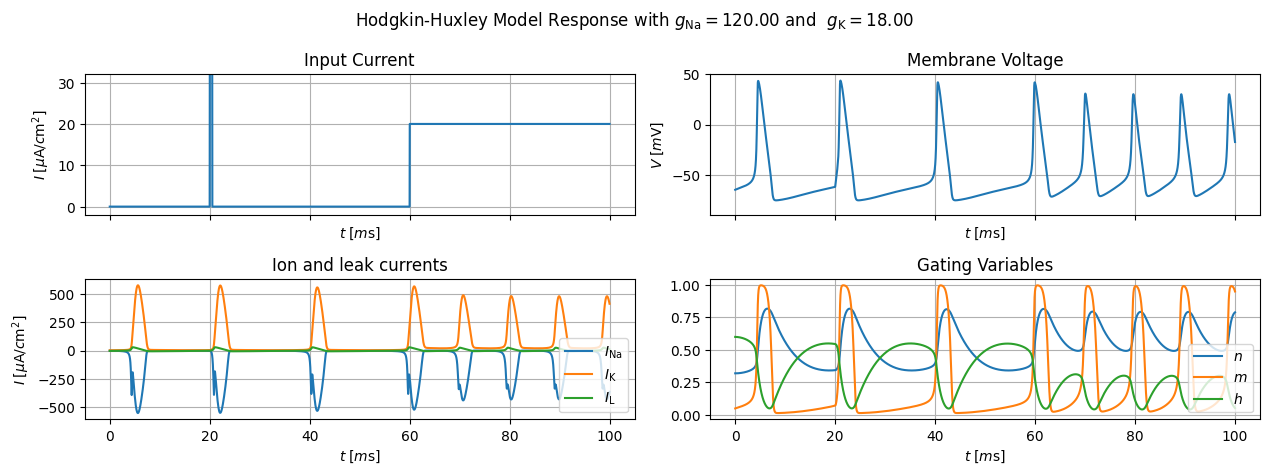

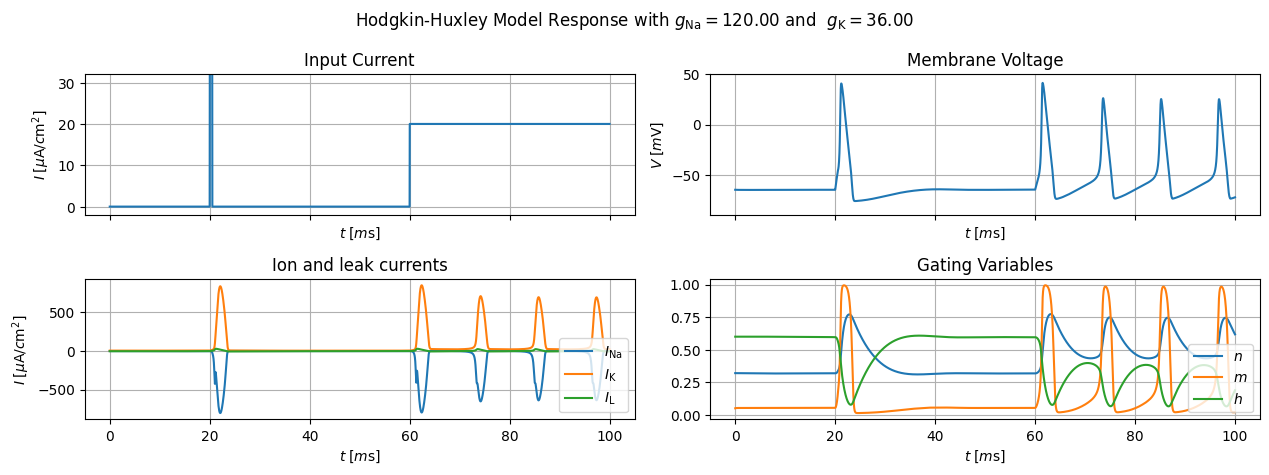

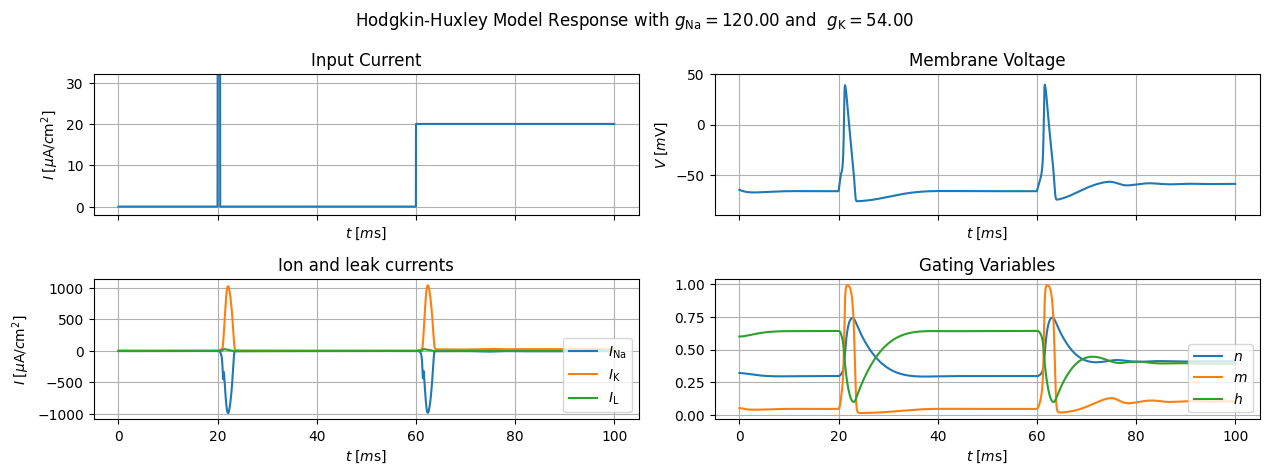

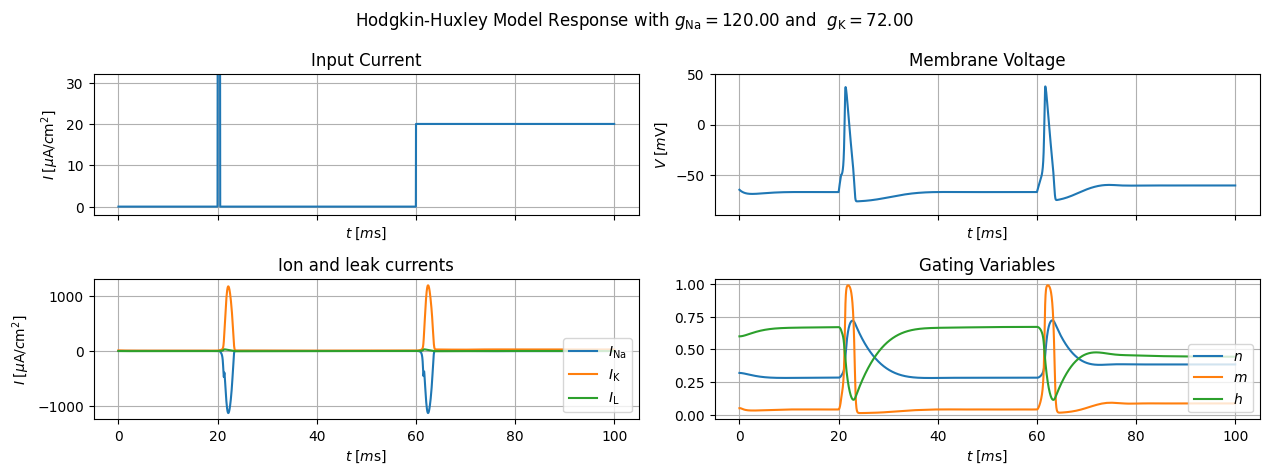

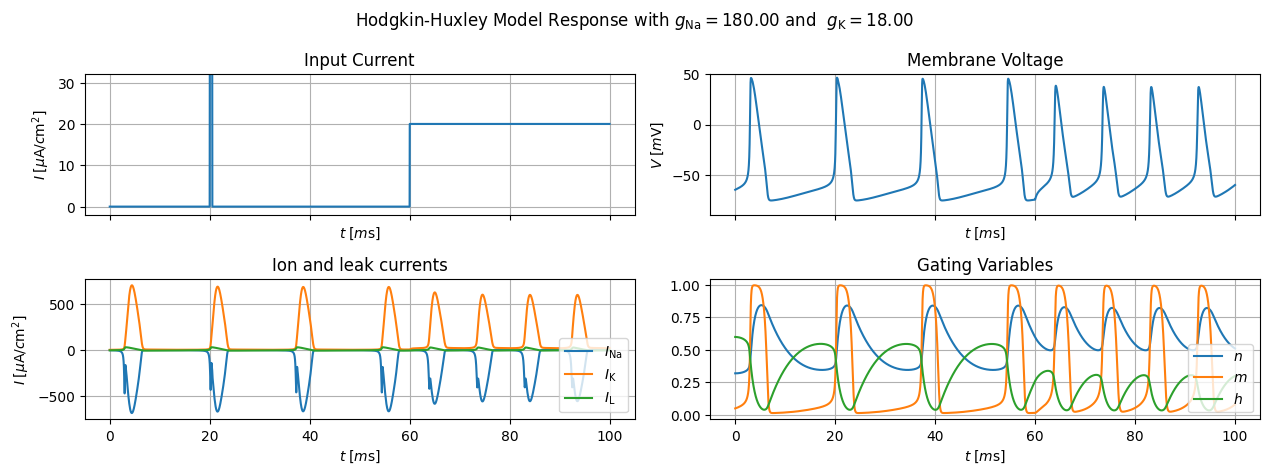

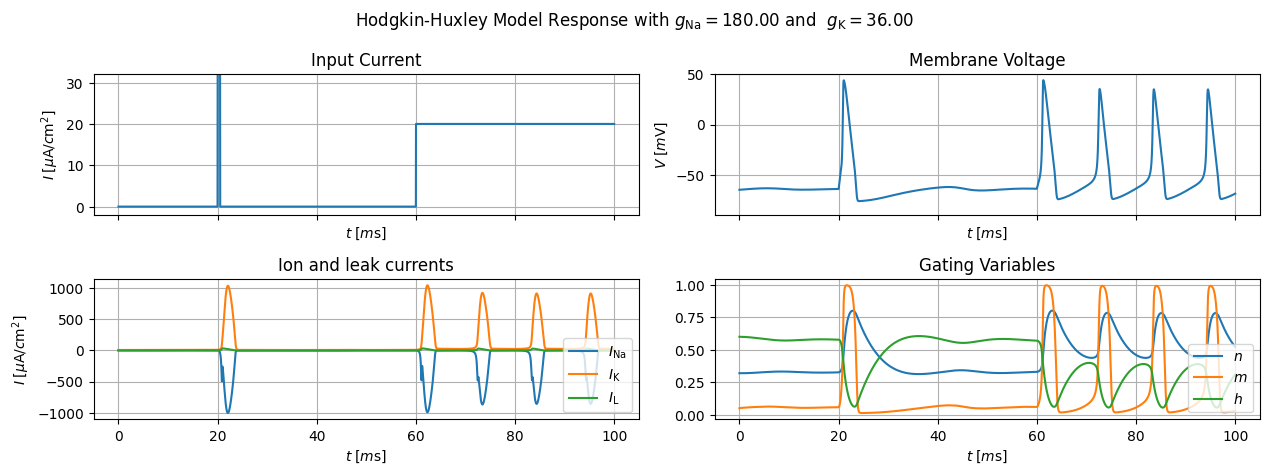

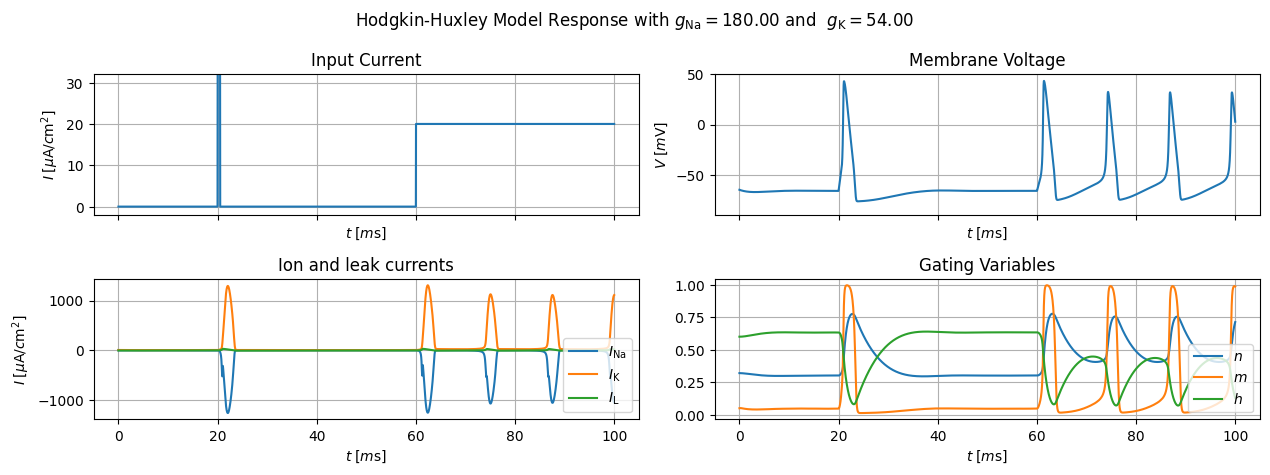

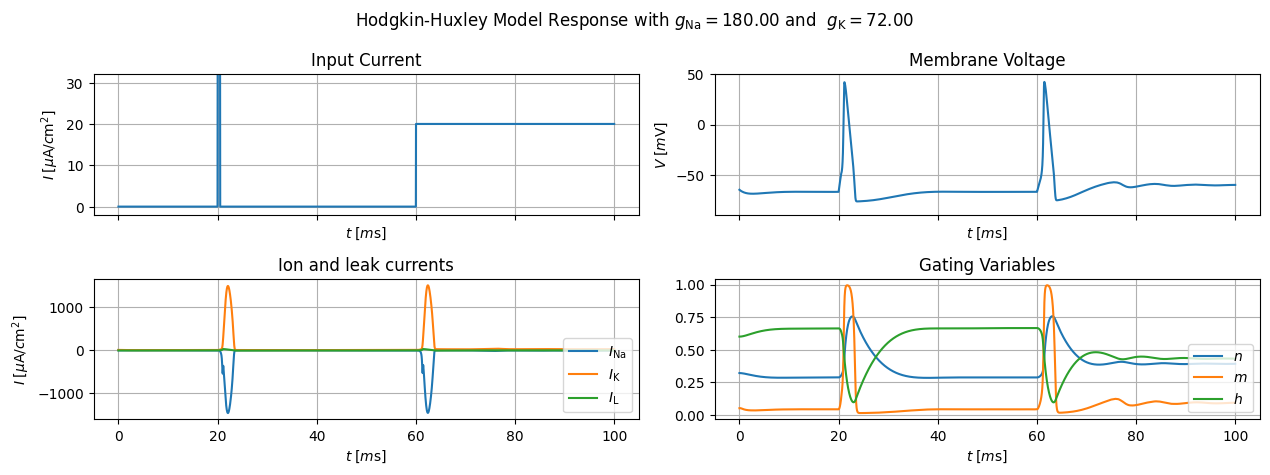

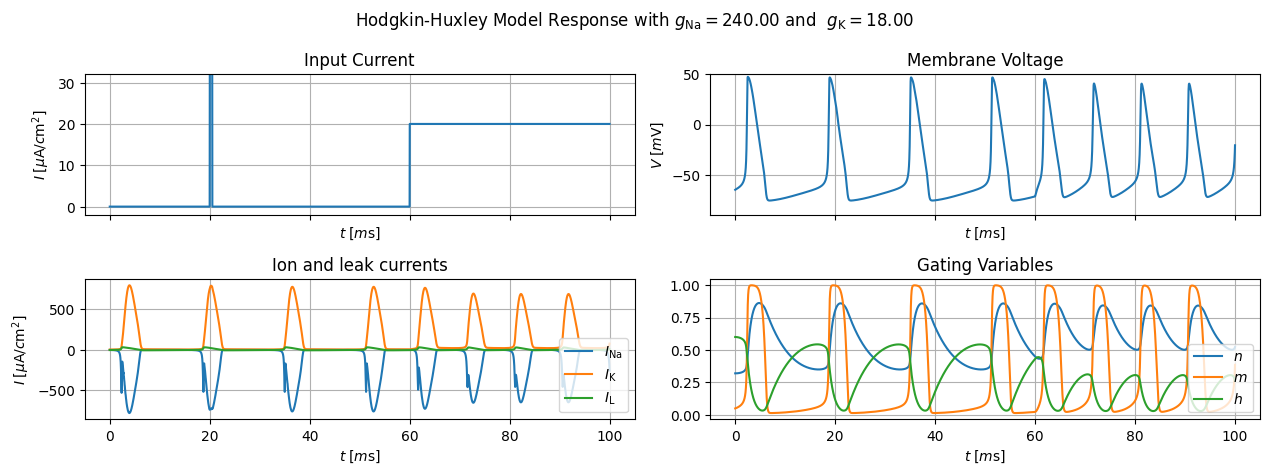

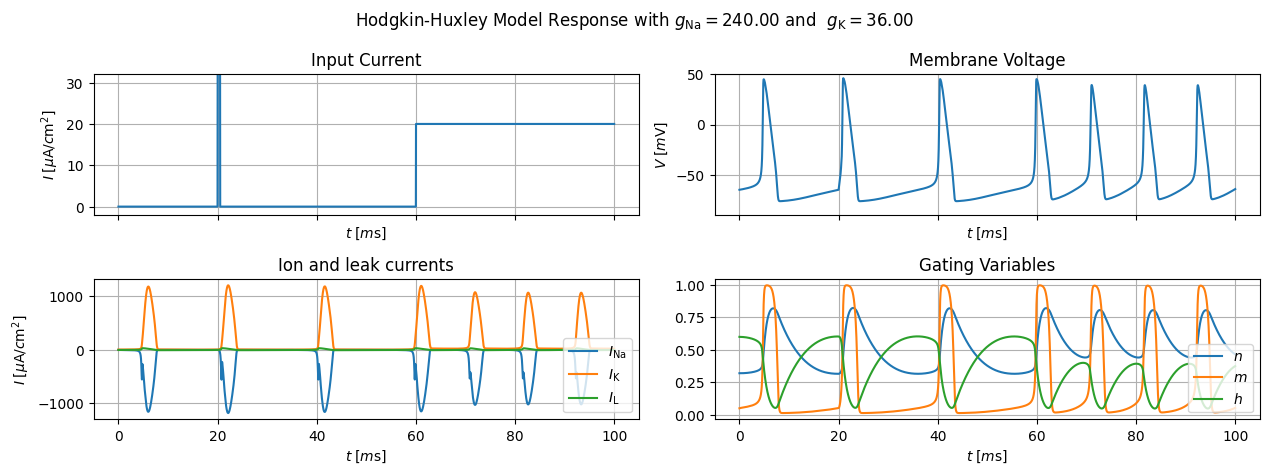

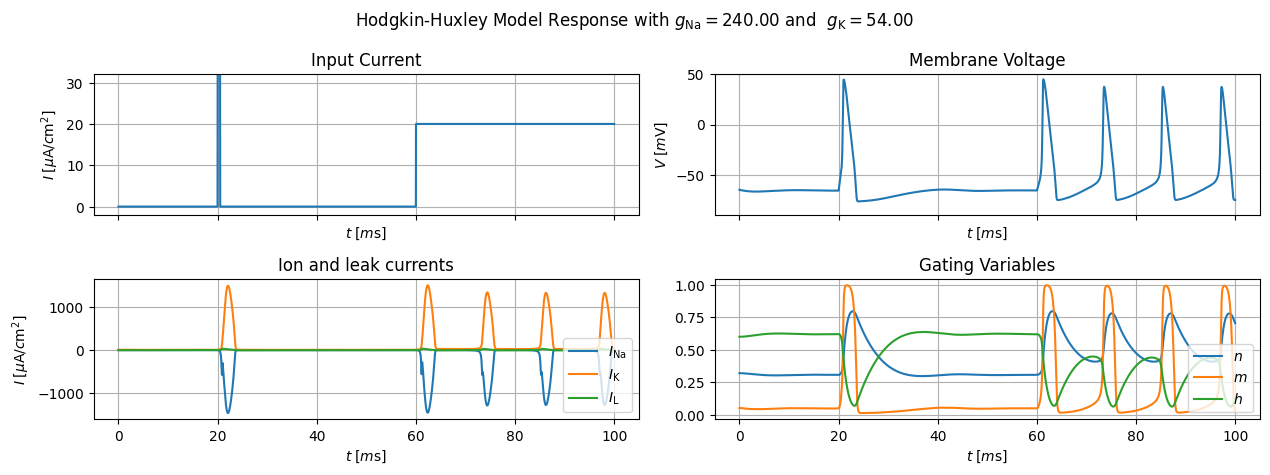

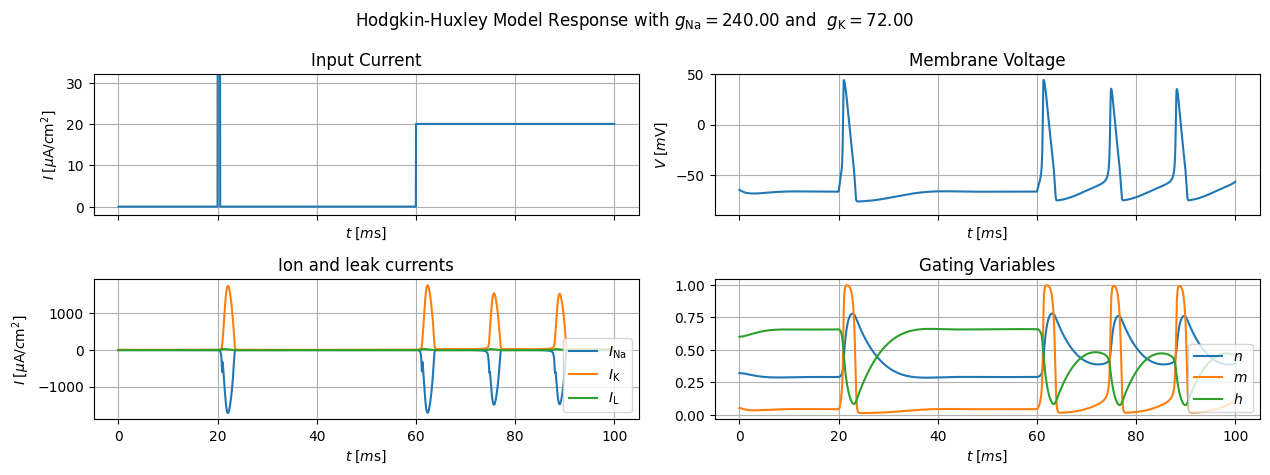

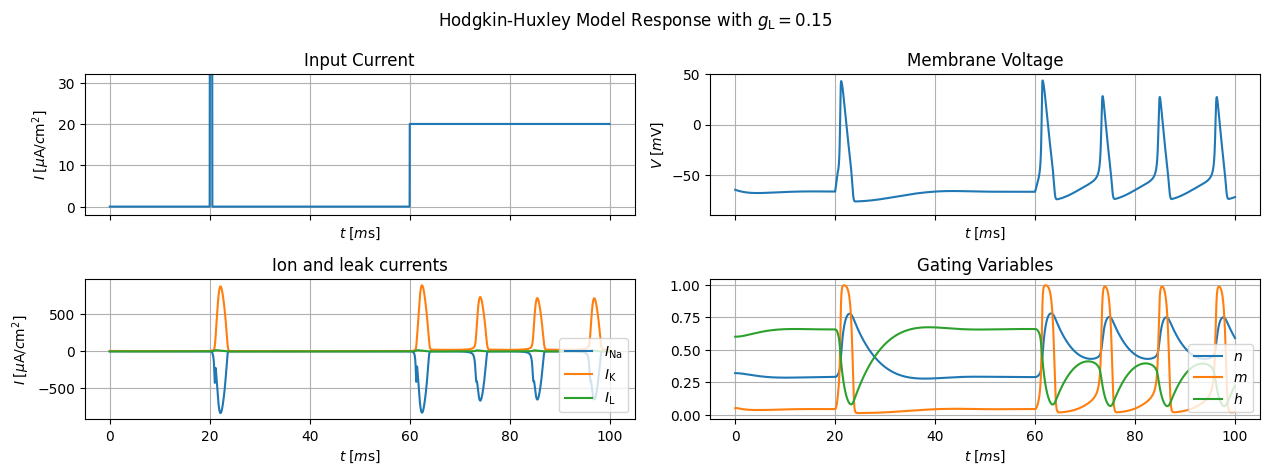

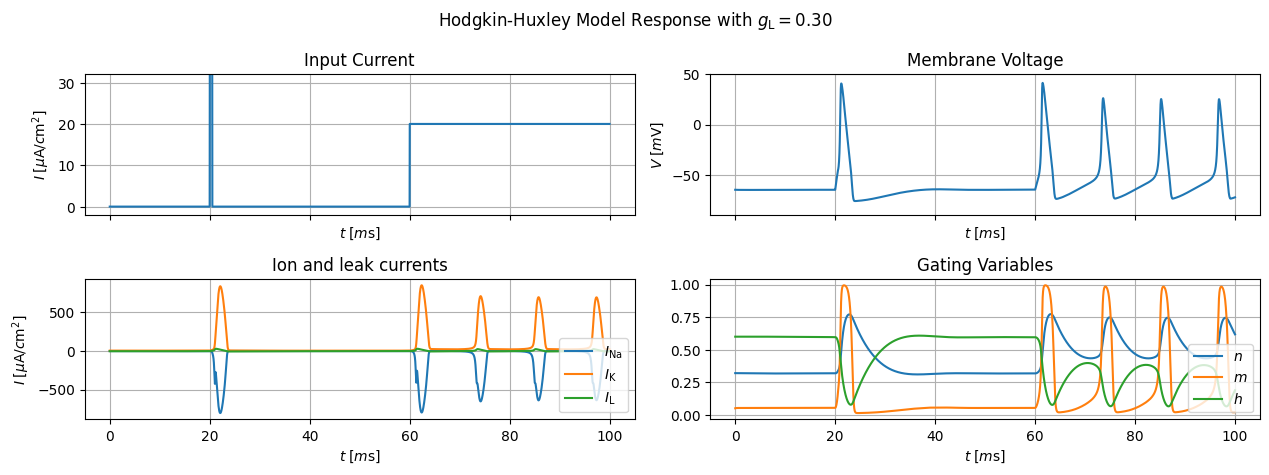

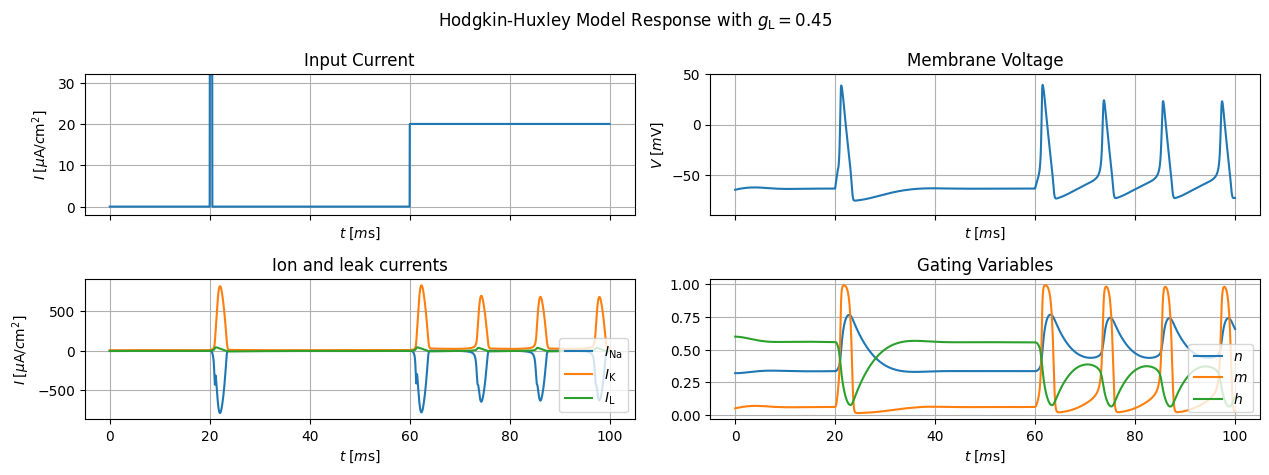

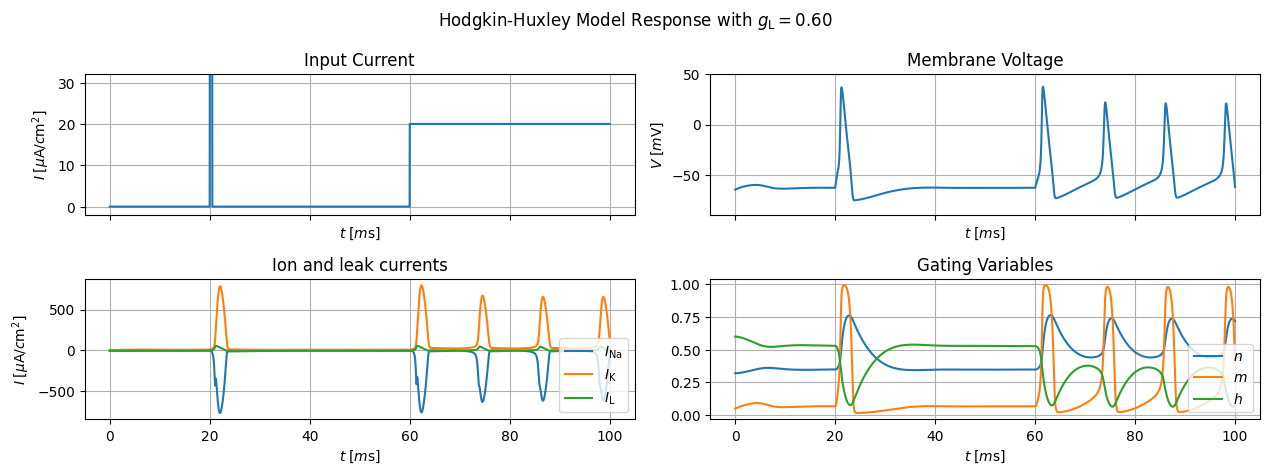

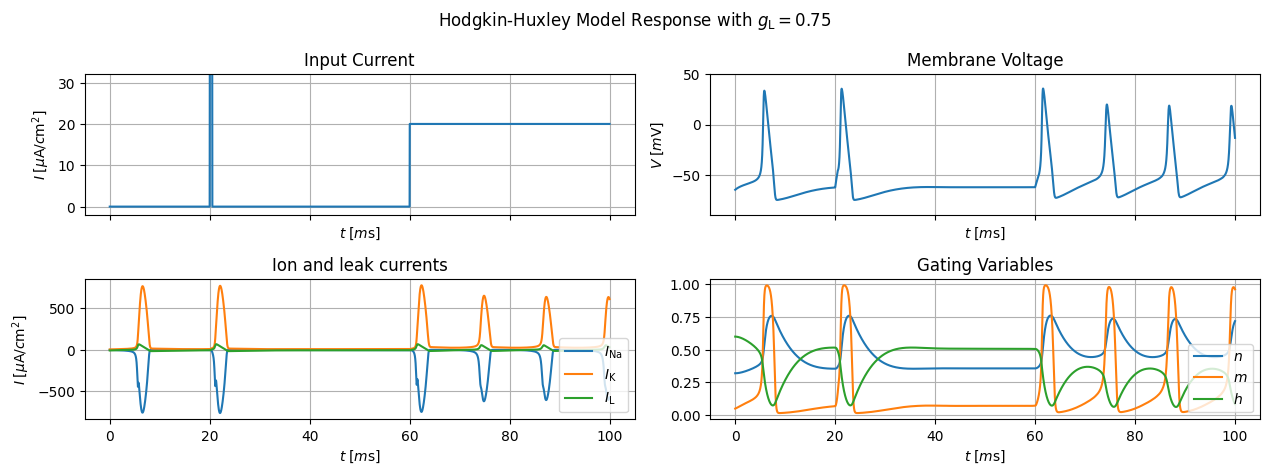

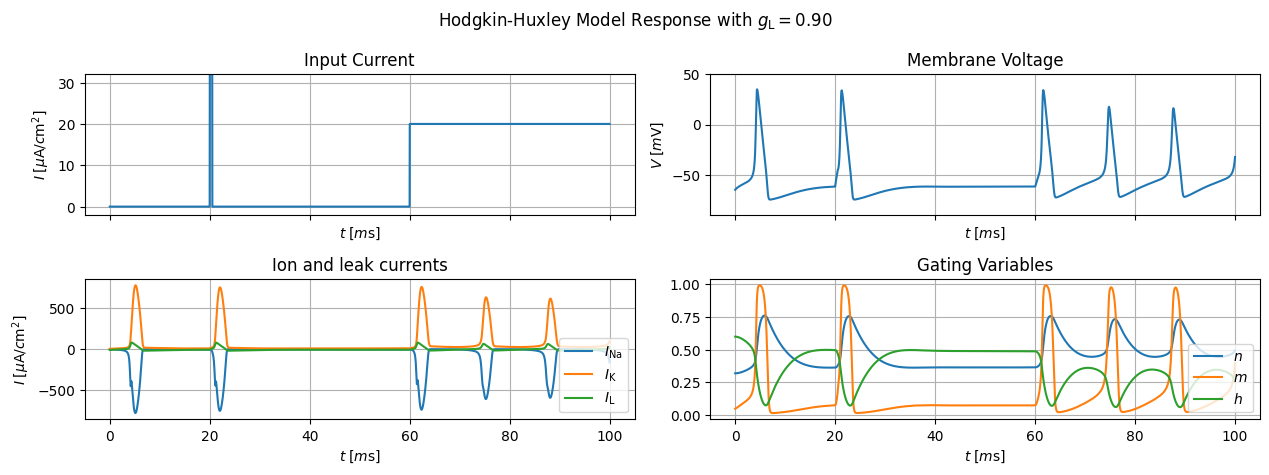

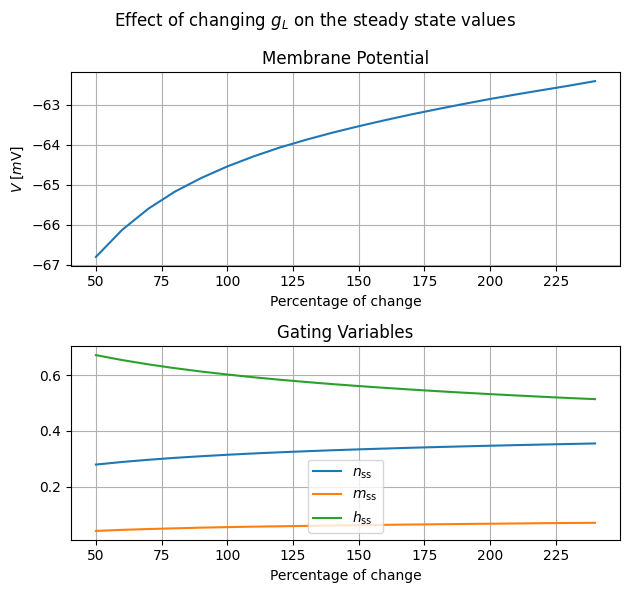

In [5]:
percentages = list(product(
    np.arange(0.5,2.5,0.5),
    np.arange(0.5,2.5,0.5),
))

k = 0

for input_current in input_currents:
    for percentage in percentages:
        model = HodgkinHuxleyModel()
        model.g_Na *= percentage[0]
        model.g_K *= percentage[1]

        sol = solve_ivp(
            lambda t, Y: model(Y, I=input_current(t)),
            t_span=[t_start, t_end],
            y0=model.get_initial_state(),
            t_eval=t,
            vectorized=True,
            method = 'RK23',
        )

        V, n, m, h = sol.y
        I_Na, I_K, I_L = model.get_currents(*sol.y)

        fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12.8, 4.8))
        ax[0,0].plot(sol.t, np.vectorize(input_current)(sol.t))
        ax[0,0].set_ylim([-2,32])
        ax[0,0].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[0,0].set_ylabel('$I\;[\mu\mathrm{A}/c\mathrm{m}^2]$')
        ax[0,0].set_title('Input Current')
        ax[0,0].grid()
        ax[0,1].plot(sol.t, V)
        ax[0,1].set_ylim([-90,50])
        ax[0,1].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[0,1].set_ylabel('$V\;[m\mathrm{V}]$')
        ax[0,1].set_title('Membrane Voltage')
        ax[0,1].grid()
        ax[1,0].plot(sol.t, I_Na, label='$I_\mathrm{Na}$')
        ax[1,0].plot(sol.t, I_K, label='$I_\mathrm{K}$')
        ax[1,0].plot(sol.t, I_L, label='$I_\mathrm{L}$')
        ax[1,0].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[1,0].set_ylabel('$I\;[\mu\mathrm{A}/c\mathrm{m}^2]$')
        ax[1,0].set_title('Ion and leak currents')
        ax[1,0].legend(loc='lower right')
        ax[1,0].grid()
        ax[1,1].plot(sol.t, n, label='$n$')
        ax[1,1].plot(sol.t, m, label='$m$')
        ax[1,1].plot(sol.t, h, label='$h$')
        ax[1,1].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[1,1].set_title('Gating Variables')
        ax[1,1].legend(loc='lower right')
        ax[1,1].grid()
        fig.suptitle('Hodgkin-Huxley Model Response with $g_\mathrm{Na}=' + f'{model.g_Na:.2f}' + '$ and  $g_\mathrm{K}=' + f'{model.g_K:.2f}$')
        plt.tight_layout()
        if save_figures:
            plt.savefig(f'{save_dir}/{questions_number}_2_{k}.png')
            k += 1

Part_3

In [ ]:
k = 0

for input_current in input_currents:
    for percentage in np.arange(0.5,3.5,0.5):
        model = HodgkinHuxleyModel()
        model.g_L *= percentage

        sol = solve_ivp(
            lambda t, Y: model(Y, I=input_current(t)),
            t_span=[t_start, t_end],
            y0=model.get_initial_state(),
            t_eval=t,
            vectorized=True,
            method = 'RK23',
        )

        V, n, m, h = sol.y
        I_Na, I_K, I_L = model.get_currents(*sol.y)

        fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12.8, 4.8))
        ax[0,0].plot(sol.t, np.vectorize(input_current)(sol.t))
        ax[0,0].set_ylim([-2,32])
        ax[0,0].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[0,0].set_ylabel('$I\;[\mu\mathrm{A}/c\mathrm{m}^2]$')
        ax[0,0].set_title('Input Current')
        ax[0,0].grid()
        ax[0,1].plot(sol.t, V)
        ax[0,1].set_ylim([-90,50])
        ax[0,1].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[0,1].set_ylabel('$V\;[m\mathrm{V}]$')
        ax[0,1].set_title('Membrane Voltage')
        ax[0,1].grid()
        ax[1,0].plot(sol.t, I_Na, label='$I_\mathrm{Na}$')
        ax[1,0].plot(sol.t, I_K, label='$I_\mathrm{K}$')
        ax[1,0].plot(sol.t, I_L, label='$I_\mathrm{L}$')
        ax[1,0].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[1,0].set_ylabel('$I\;[\mu\mathrm{A}/c\mathrm{m}^2]$')
        ax[1,0].set_title('Ion and leak currents')
        ax[1,0].legend(loc='lower right')
        ax[1,0].grid()
        ax[1,1].plot(sol.t, n, label='$n$')
        ax[1,1].plot(sol.t, m, label='$m$')
        ax[1,1].plot(sol.t, h, label='$h$')
        ax[1,1].set_xlabel('$t\;[m\mathrm{s}]$')
        ax[1,1].set_title('Gating Variables')
        ax[1,1].legend(loc='lower right')
        ax[1,1].grid()
        fig.suptitle('Hodgkin-Huxley Model Response with $g_\mathrm{L}=' + f'{model.g_L:.2f}$')
        plt.tight_layout()
        if save_figures:
            plt.savefig(f'{save_dir}/{questions_number}_3_{k}.png')
            k += 1

t_start = 0
t_end = 40
dt = 0.01
t = np.arange(t_start, t_end, dt)

percetages_to_test = np.arange(0.5,2.5,0.1)
steady_state_values = np.zeros((4,) + percetages_to_test.shape)

for input_current in input_currents:
    for i, percentage in enumerate(percetages_to_test):
        model = HodgkinHuxleyModel()
        model.g_L *= percentage

        sol = solve_ivp(
            lambda t, Y: model(Y, I=input_current(t)),
            t_span=[t_start, t_end],
            y0=model.get_initial_state(),
            t_eval=t,
            vectorized=True,
            method = 'RK23',
        )

        steady_state_values[:, i] = sol.y[:,-1]

V_ss, n_ss, m_ss, h_ss = steady_state_values

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6.4, 6))
ax[0].plot(percetages_to_test * 100, V_ss)
ax[0].set_xlabel('Percentage of change')
ax[0].set_ylabel('$V\;[m\mathrm{V}]$')
ax[0].set_title('Membrane Potential')
ax[0].grid()
ax[1].plot(percetages_to_test * 100, n_ss, label='$n_\mathrm{ss}$')
ax[1].plot(percetages_to_test * 100, m_ss, label='$m_\mathrm{ss}$')
ax[1].plot(percetages_to_test * 100, h_ss, label='$h_\mathrm{ss}$')
ax[1].set_xlabel('Percentage of change')
ax[1].set_title('Gating Variables')
ax[1].legend()
ax[1].grid()
fig.suptitle('Effect of changing $g_L$ on the steady state values')
plt.tight_layout()
if save_figures:
    plt.savefig(f'{save_dir}/{questions_number}_3_{k}.png')
    k += 1

plt.show()